In [1]:
import json
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import numpy as np

In [2]:
# loading the dataset
with open('../data/dataset.json', 'r') as f:
    dataset = json.load(f)
    positives = dataset['positives']
    negatives = dataset['negatives']

# Shuffling the data
a = [(i, 0) for i in negatives]
b = [(i, 1) for i in positives]
combined = a + b
np.random.shuffle(combined)
shuffled = list(zip(*combined))
text_X = shuffled[0]
labels = shuffled[1]


In [3]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(text_X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(text_X, labels, test_size=0.2, random_state=42)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime

train_start = datetime.datetime.now()
logreg = LogisticRegression()
logreg.fit(xtrain_tfidf_ngram_chars, y_train)
train_end = datetime.datetime.now()
print("Training time: ", (train_end - train_start))

/research_data/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time:  0:01:44.285093


In [6]:
y_pred = logreg.predict(xvalid_tfidf_ngram_chars)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xvalid_tfidf_ngram_chars, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[258746  28785]
 [ 41944 255866]]


In [ ]:
The result is telling us that we have 258746+255866 correct predictions and 28785+41944  incorrect predictions.

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    287531
           1       0.90      0.86      0.88    297810

    accuracy                           0.88    585341
   macro avg       0.88      0.88      0.88    585341
weighted avg       0.88      0.88      0.88    585341



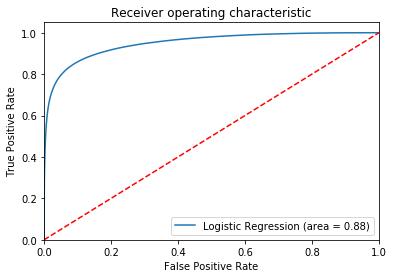

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(xvalid_tfidf_ngram_chars)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest Classifier

In [ ]:
clf = ensemble.RandomForestClassifier()
clf.fit(xtrain_tfidf_ngram_chars, y_train)
accuracy = clf.score(xvalid_tfidf_ngram_chars, y_test)
print("RF, WordLevel TF-IDF: ", accuracy)

RF, WordLevel TF-IDF:  0.8980850478609904